In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
feature_mat = pd.read_csv('/Users/clairez/Desktop/BENG203_Final_Project/Data/log2_tpm_matrix_subset.tsv', sep='\t', index_col=0)
feature_mat = feature_mat.T
feature_mat.index.name = 'Sample_id'
feature_mat

,ENSG00000087085,ENSG00000130203,ENSG00000091831,ENSG00000142192,ENSG00000147571,ENSG00000137642,ENSG00000125538,ENSG00000036530,ENSG00000197943,ENSG00000120885,...,ENSG00000163346,ENSG00000178104,ENSG00000092621,ENSG00000164050,ENSG00000151552,ENSG00000112531,ENSG00000119729,ENSG00000111961,ENSG00000182902,ENSG00000136205
Sample_id,,,,,,,,,,,,,,,,,,,,,
SRR10192321,1.073635,5.397683,1.745157,6.565631,0.000000,6.915270,5.761997,2.418091,8.041743,8.475732,...,6.964390,5.441454,3.906235,3.497607,4.272396,8.579414,5.087156,8.144319,2.133269,5.555869
SRR10192320,1.331614,2.830816,2.201304,7.736504,0.000000,5.829020,5.113864,0.000000,6.755516,9.934051,...,6.839634,4.688950,0.000000,2.585030,4.910838,8.694468,4.928148,7.161749,0.000000,4.767496
SRR10192319,2.887412,3.797267,2.949139,7.699425,0.000000,5.561178,5.681847,0.864909,6.836189,7.500531,...,6.305982,4.923537,0.000000,2.322826,4.853205,8.939043,4.171937,8.226978,0.707259,5.070986
SRR10192318,3.547307,2.992385,1.732680,8.533783,0.000000,6.232627,5.194531,0.000000,7.319196,10.857406,...,7.457346,5.030317,1.013229,4.322269,4.246930,8.002069,4.264799,7.129143,0.271610,5.823527
SRR10192317,2.565222,3.746290,2.519941,8.369163,0.000000,5.442327,5.658253,0.155602,6.517113,10.463861,...,6.531010,4.440498,2.284944,3.628454,4.190017,8.416520,5.017643,7.112883,1.860865,5.189426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR10192327,1.184584,1.920156,2.936581,7.124247,0.000000,4.023890,4.874143,0.810044,5.476043,10.087563,...,6.224799,4.034090,1.924056,2.642814,2.662728,7.760740,3.811690,6.336040,1.497704,4.510544
SRR10192326,2.814476,1.170309,5.176617,8.679612,0.000000,7.015452,5.053861,0.745532,6.763382,10.707034,...,7.538239,4.564878,0.000000,5.806535,3.403139,7.851258,4.226974,9.273409,0.000000,6.797327
SRR10192325,0.355799,2.279331,0.827186,7.206924,0.000000,3.351467,3.817038,0.000000,5.711601,10.177168,...,6.028549,4.216106,1.912023,2.852716,2.787602,6.757828,3.567908,5.706961,0.988158,4.287392


In [4]:
metadata = pd.read_excel('/Users/clairez/Desktop/BENG203_Final_Project/Data/toden_metadata.xlsx')
metadata.rename(columns={'Run': 'Sample_id'}, inplace=True)
metadata

,Sample_id,Tissue,Age,PatientID,Ethnicity,Gender,Center,Disease,MMSE,CDR,Apoe.status,apoe_carrier,apoe_dose
0,SRR10192321,Plasma,75.0,434,NaN,Female,University of Washington at St. Louis,NCI,30.0,0.0,E3/E3,no_apoe4,no_apoe4
1,SRR10192320,Plasma,74.0,435,NaN,Female,University of Washington at St. Louis,NCI,30.0,0.0,E2/E4,apoe4,apoe4
2,SRR10192319,Plasma,73.0,438,NaN,Female,University of Washington at St. Louis,NCI,29.0,0.0,E3/E3,no_apoe4,no_apoe4
3,SRR10192318,Plasma,68.0,447,NaN,Male,University of Washington at St. Louis,NCI,29.0,0.0,E3/E4,apoe4,apoe4
4,SRR10192317,Plasma,68.0,447,NaN,Male,University of Washington at St. Louis,NCI,29.0,0.0,E3/E4,apoe4,apoe4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,SRR10192327,Plasma,87.0,2657,Caucasian,Female,BioIVT,NCI,NaN,NaN,NaN,NaN,NaN
330,SRR10192326,Plasma,86.0,2658,African American,Male,BioIVT,NCI,NaN,NaN,NaN,NaN,NaN
331,SRR10192325,Plasma,65.0,2659,Hispanic,Female,BioIVT,NCI,NaN,NaN,NaN,NaN,NaN
332,SRR10192324,Plasma,66.0,2660,Hispanic,Male,BioIVT,NCI,NaN,NaN,NaN,NaN,NaN


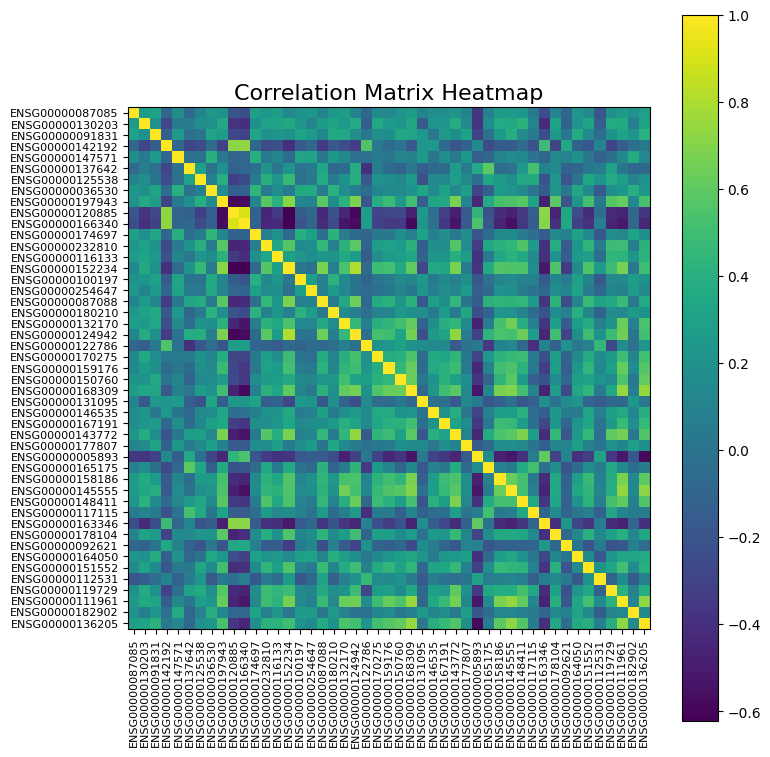

In [5]:
from scipy.stats import pearsonr

# Test correlations between genes
corr_matrix = feature_mat.corr(method='pearson')

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(corr_matrix.values, aspect='equal')

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=90, fontsize=8)
ax.set_yticklabels(corr_matrix.index, fontsize=8)

ax.set_title('Correlation Matrix Heatmap', fontsize=16)
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

In [6]:
abs_corr_matrix = feature_mat.corr(method='pearson').abs()
upper = abs_corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
to_drop = [col for col in upper.columns if any(upper[col] >= 0.8)]
print(to_drop)
feature_mat_reduced = feature_mat.drop(columns=to_drop)
feature_mat_reduced

['ENSG00000166340', 'ENSG00000124942']


,ENSG00000087085,ENSG00000130203,ENSG00000091831,ENSG00000142192,ENSG00000147571,ENSG00000137642,ENSG00000125538,ENSG00000036530,ENSG00000197943,ENSG00000120885,...,ENSG00000163346,ENSG00000178104,ENSG00000092621,ENSG00000164050,ENSG00000151552,ENSG00000112531,ENSG00000119729,ENSG00000111961,ENSG00000182902,ENSG00000136205
Sample_id,,,,,,,,,,,,,,,,,,,,,
SRR10192321,1.073635,5.397683,1.745157,6.565631,0.000000,6.915270,5.761997,2.418091,8.041743,8.475732,...,6.964390,5.441454,3.906235,3.497607,4.272396,8.579414,5.087156,8.144319,2.133269,5.555869
SRR10192320,1.331614,2.830816,2.201304,7.736504,0.000000,5.829020,5.113864,0.000000,6.755516,9.934051,...,6.839634,4.688950,0.000000,2.585030,4.910838,8.694468,4.928148,7.161749,0.000000,4.767496
SRR10192319,2.887412,3.797267,2.949139,7.699425,0.000000,5.561178,5.681847,0.864909,6.836189,7.500531,...,6.305982,4.923537,0.000000,2.322826,4.853205,8.939043,4.171937,8.226978,0.707259,5.070986
SRR10192318,3.547307,2.992385,1.732680,8.533783,0.000000,6.232627,5.194531,0.000000,7.319196,10.857406,...,7.457346,5.030317,1.013229,4.322269,4.246930,8.002069,4.264799,7.129143,0.271610,5.823527
SRR10192317,2.565222,3.746290,2.519941,8.369163,0.000000,5.442327,5.658253,0.155602,6.517113,10.463861,...,6.531010,4.440498,2.284944,3.628454,4.190017,8.416520,5.017643,7.112883,1.860865,5.189426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR10192327,1.184584,1.920156,2.936581,7.124247,0.000000,4.023890,4.874143,0.810044,5.476043,10.087563,...,6.224799,4.034090,1.924056,2.642814,2.662728,7.760740,3.811690,6.336040,1.497704,4.510544
SRR10192326,2.814476,1.170309,5.176617,8.679612,0.000000,7.015452,5.053861,0.745532,6.763382,10.707034,...,7.538239,4.564878,0.000000,5.806535,3.403139,7.851258,4.226974,9.273409,0.000000,6.797327
SRR10192325,0.355799,2.279331,0.827186,7.206924,0.000000,3.351467,3.817038,0.000000,5.711601,10.177168,...,6.028549,4.216106,1.912023,2.852716,2.787602,6.757828,3.567908,5.706961,0.988158,4.287392


In [33]:
merged_df = pd.merge(metadata, feature_mat_reduced, on='Sample_id', how='inner')
merged_df

,Sample_id,Tissue,Age,PatientID,Ethnicity,Gender,Center,Disease,MMSE,CDR,...,ENSG00000163346,ENSG00000178104,ENSG00000092621,ENSG00000164050,ENSG00000151552,ENSG00000112531,ENSG00000119729,ENSG00000111961,ENSG00000182902,ENSG00000136205
0,SRR10192321,Plasma,75.0,434,NaN,Female,University of Washington at St. Louis,NCI,30.0,0.0,...,6.964390,5.441454,3.906235,3.497607,4.272396,8.579414,5.087156,8.144319,2.133269,5.555869
1,SRR10192320,Plasma,74.0,435,NaN,Female,University of Washington at St. Louis,NCI,30.0,0.0,...,6.839634,4.688950,0.000000,2.585030,4.910838,8.694468,4.928148,7.161749,0.000000,4.767496
2,SRR10192319,Plasma,73.0,438,NaN,Female,University of Washington at St. Louis,NCI,29.0,0.0,...,6.305982,4.923537,0.000000,2.322826,4.853205,8.939043,4.171937,8.226978,0.707259,5.070986
3,SRR10192318,Plasma,68.0,447,NaN,Male,University of Washington at St. Louis,NCI,29.0,0.0,...,7.457346,5.030317,1.013229,4.322269,4.246930,8.002069,4.264799,7.129143,0.271610,5.823527
4,SRR10192317,Plasma,68.0,447,NaN,Male,University of Washington at St. Louis,NCI,29.0,0.0,...,6.531010,4.440498,2.284944,3.628454,4.190017,8.416520,5.017643,7.112883,1.860865,5.189426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,SRR10192327,Plasma,87.0,2657,Caucasian,Female,BioIVT,NCI,NaN,NaN,...,6.224799,4.034090,1.924056,2.642814,2.662728,7.760740,3.811690,6.336040,1.497704,4.510544
330,SRR10192326,Plasma,86.0,2658,African American,Male,BioIVT,NCI,NaN,NaN,...,7.538239,4.564878,0.000000,5.806535,3.403139,7.851258,4.226974,9.273409,0.000000,6.797327
331,SRR10192325,Plasma,65.0,2659,Hispanic,Female,BioIVT,NCI,NaN,NaN,...,6.028549,4.216106,1.912023,2.852716,2.787602,6.757828,3.567908,5.706961,0.988158,4.287392
332,SRR10192324,Plasma,66.0,2660,Hispanic,Male,BioIVT,NCI,NaN,NaN,...,7.661877,5.473531,4.714356,4.879511,5.878068,7.823881,2.848384,6.765003,0.000000,5.204946


In [ ]:
merged_df.to_csv('/Users/clairez/Desktop/BENG203_Final_Project/Data/processed_feature_table.txt', sep='\t', index=False)